In [1]:
from utilities import hierarchy_pos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from gensim.models.poincare import PoincareModel
import random

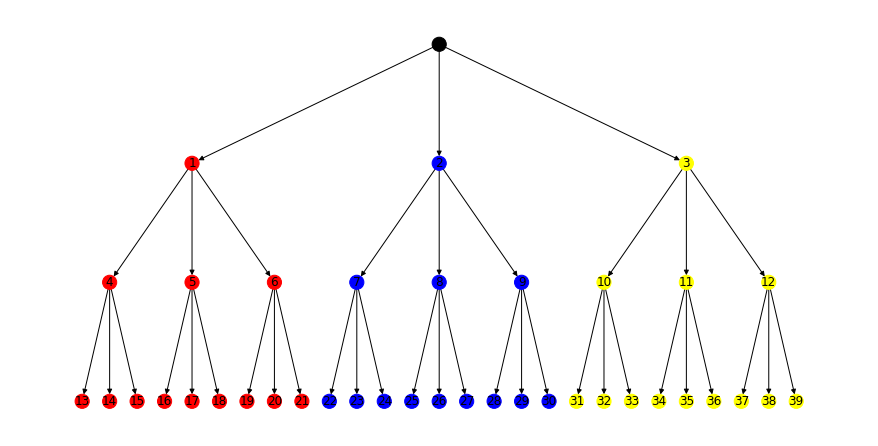

In [2]:
# Parametri: r = Numero di figli per nodo, h = altezza albero
G = nx.balanced_tree(r=3, h=3)
h = 3

#------------------------------------
root = 0
children = list(G.neighbors(root))  # i 3 figli diretti
colors = ["red", "blue", "yellow", "green"]

node_colors = [None] * G.number_of_nodes()

for color, child in zip(colors, children):
    Gc = G.copy()
    Gc.remove_edge(root, child)
    subtree_nodes = nx.node_connected_component(Gc, child)
    for n in subtree_nodes:
        node_colors[n] = color

node_colors[root] = "black"
#-----------------------------------

pos = hierarchy_pos(G, 0)

# Creo un DiGraph orientato root → figli
root = 0
G = nx.bfs_tree(G, source=root)

plt.figure(figsize=(12, 6))
nx.draw(G, pos=pos, with_labels=True, node_size=200, node_color=node_colors)
plt.show()

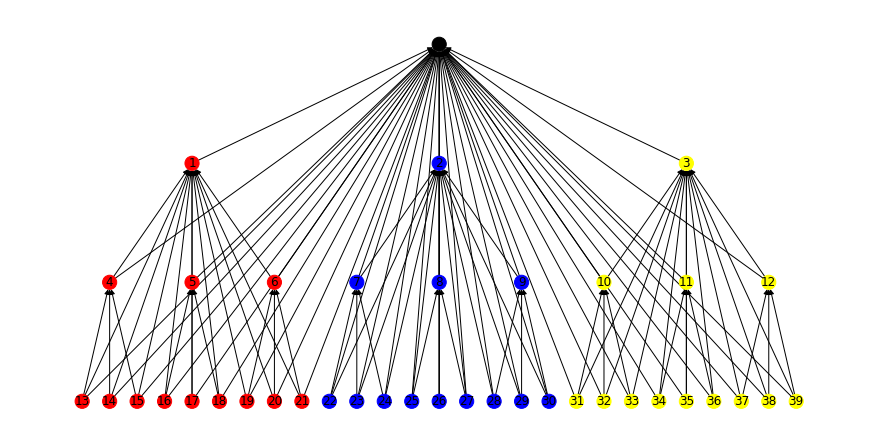

In [3]:
root = 0
Gt = nx.DiGraph()
Gt.add_edges_from(G.edges())
Gt = nx.transitive_closure(Gt)

DG = Gt.reverse(copy=True)

"""
DG = nx.DiGraph()
DG.add_nodes_from(Gt.nodes())
for u, v in Gt.edges():
    DG.add_edge(v, u)  # direzione v -> u"""

plt.figure(figsize=(12, 6))
nx.draw(DG, pos=pos, with_labels=True, node_size=200, node_color=node_colors)
plt.show()

In [4]:
depths = dict(nx.single_source_shortest_path_length(G, 0))

# Normalizzazione della dimensione in base alla profondità
# (più grande alla radice, più piccolo alle foglie)
max_size = 40
min_size = 7
node_sizes = [
    max_size - ( (depth / h) * (max_size - min_size) )
    for depth in depths.values()
]

In [13]:
model = PoincareModel(train_data=DG.edges(), size=2, negative=6, burn_in=50, burn_in_alpha=0.05, alpha=0.15)

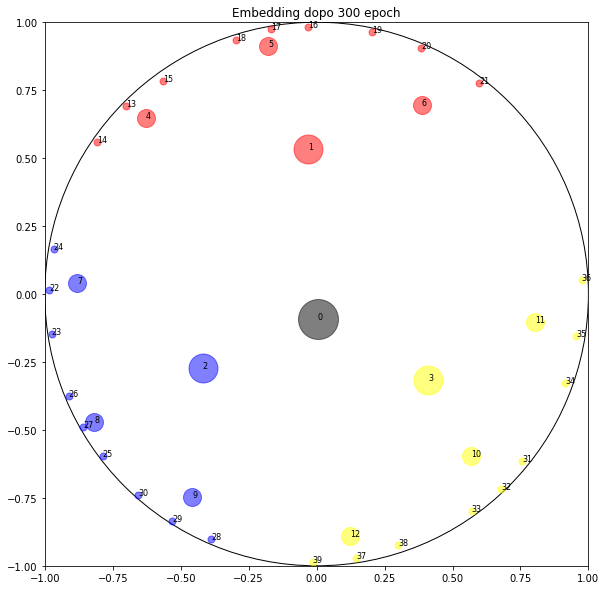

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

embedding_history = []
labels = model.kv.index_to_key
embedding = np.array([model.kv[k] for k in labels])
embedding_history.append(embedding)

# Addestramento con salvataggio ogni epoch
for epoch in range(300):
    model.train(epochs=1)

    embedding = np.array([model.kv[k] for k in labels])
    embedding_history.append(embedding)

# Funzione per disegnare embedding a uno step specifico
def plot_embedding(step):
    emb = embedding_history[step]
    plt.figure(figsize=(10, 10))
    
    # Cerchio del disco di Poincaré
    circle = plt.Circle((0,0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)

    for i, label in enumerate(labels):
        x, y = emb[i]
        plt.plot(x, y, 'o', color=node_colors[label], markersize=node_sizes[label], alpha=0.5)
        plt.text(x, y, label, fontsize=8)
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.title(f'Embedding dopo {step} epoch')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

#interact(plot_embedding, step=IntSlider(min=0, max=len(embedding_history)-1, step=1, value=0))
plot_embedding(300)

## ------------------------------------------------------------------------------------------------------------

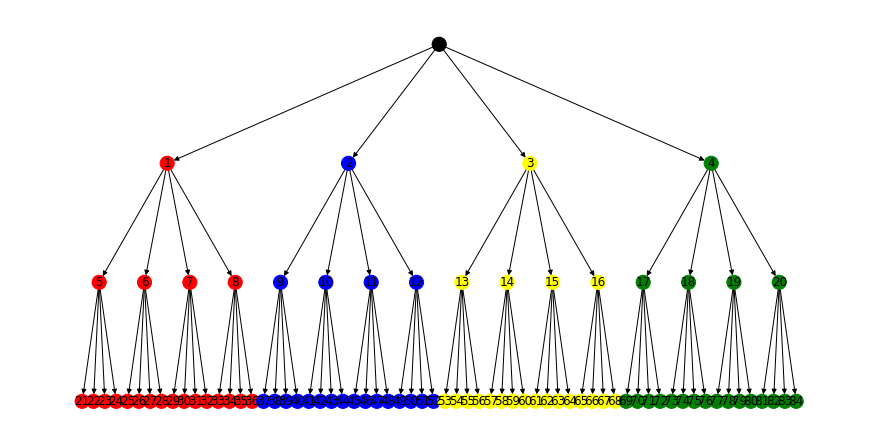

In [8]:
# Parametri: r = Numero di figli per nodo, h = altezza albero
G = nx.balanced_tree(r=4, h=3)
h = 3

#------------------------------------
root = 0
children = list(G.neighbors(root))  # i 3 figli diretti
colors = ["red", "blue", "yellow", "green"]

node_colors = [None] * G.number_of_nodes()

for color, child in zip(colors, children):
    Gc = G.copy()
    Gc.remove_edge(root, child)
    subtree_nodes = nx.node_connected_component(Gc, child)
    for n in subtree_nodes:
        node_colors[n] = color

node_colors[root] = "black"
#-----------------------------------

pos = hierarchy_pos(G, 0)

# Creo un DiGraph orientato root → figli
root = 0
G = nx.bfs_tree(G, source=root)

plt.figure(figsize=(12, 6))
nx.draw(G, pos=pos, with_labels=True, node_size=200, node_color=node_colors)
plt.show()

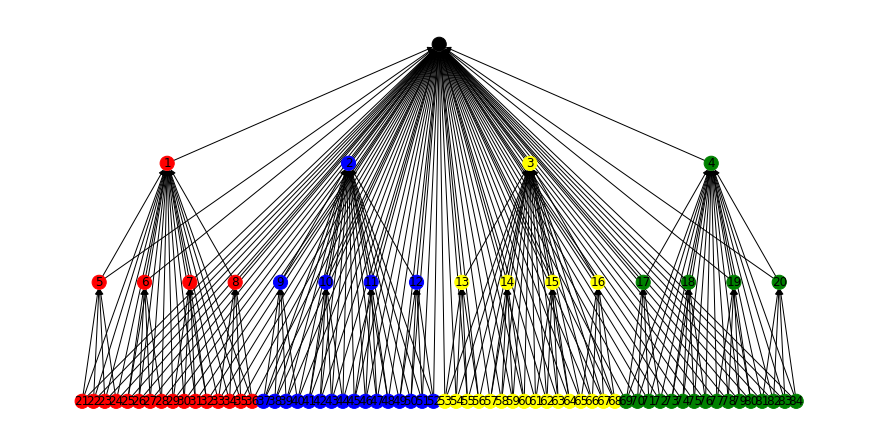

In [9]:
root = 0
Gt = nx.DiGraph()
Gt.add_edges_from(G.edges())
Gt = nx.transitive_closure(Gt)

DG = Gt.reverse(copy=True)

plt.figure(figsize=(12, 6))
nx.draw(DG, pos=pos, with_labels=True, node_size=200, node_color=node_colors)
plt.show()

In [14]:
depths = dict(nx.single_source_shortest_path_length(G, 0))

# Normalizzazione della dimensione in base alla profondità
# (più grande alla radice, più piccolo alle foglie)
max_size = 40
min_size = 7
node_sizes = [
    max_size - ( (depth / h) * (max_size - min_size) )
    for depth in depths.values()
]

In [22]:
model = PoincareModel(train_data=DG.edges(), size=2, negative=11, burn_in=70, burn_in_alpha=0.05, alpha=0.15)

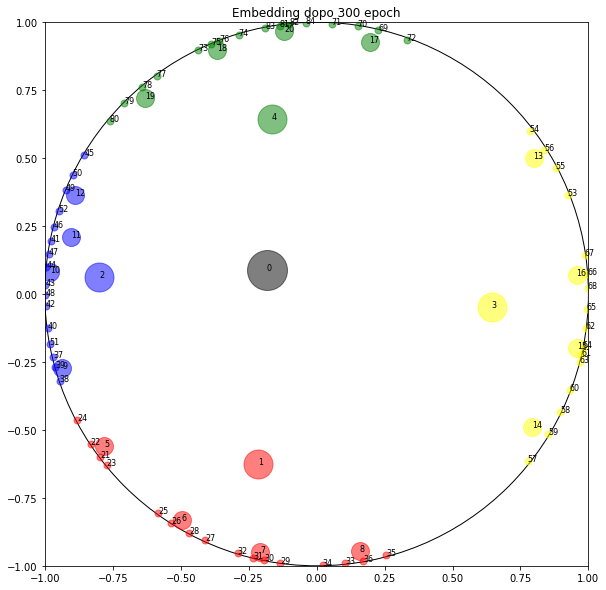

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

embedding_history = []
labels = model.kv.index_to_key
embedding = np.array([model.kv[k] for k in labels])
embedding_history.append(embedding)

# Addestramento con salvataggio ogni epoch
for epoch in range(300):
    model.train(epochs=1)

    embedding = np.array([model.kv[k] for k in labels])
    embedding_history.append(embedding)

# Funzione per disegnare embedding a uno step specifico
def plot_embedding(step):
    emb = embedding_history[step]
    plt.figure(figsize=(10, 10))
    
    # Cerchio del disco di Poincaré
    circle = plt.Circle((0,0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)

    for i, label in enumerate(labels):
        x, y = emb[i]
        plt.plot(x, y, 'o', color=node_colors[label], markersize=node_sizes[label], alpha=0.5)
        plt.text(x, y, label, fontsize=8)
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.title(f'Embedding dopo {step} epoch')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

#interact(plot_embedding, step=IntSlider(min=0, max=len(embedding_history)-1, step=1, value=0))
plot_embedding(300)

### Verifico che distanze

In [24]:
print(model.kv.distance(0, 1), model.kv.distance(0, 5), model.kv.distance(0, 22))
print(model.kv.distance(5, 22))

1.7227377926819596 3.779816546846715 6.5672628118189635
3.3953155815313973


## Test su WordNet a partire dalla radice animal.n.01

In [5]:
from utilities import hierarchy_pos
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from nltk.corpus import wordnet as wn
from gensim.models.poincare import PoincareModel

def add_transitive_edges(G, max_depth=3):
    pairs = []
    for source in G.nodes():
        # BFS fino a max_depth
        for target in nx.descendants(G, source):
            try:
                d = nx.shortest_path_length(G, source, target)
            except nx.NetworkXNoPath:
                continue
            if d <= max_depth:
                pairs.append((source, target))
    return pairs

def add_hyponyms(synset, G, visited):
    if synset in visited:
        return
    visited.add(synset)
    
    for hyponym in synset.hyponyms():
        G.add_edge(synset.name(), hyponym.name())
        add_hyponyms(hyponym, G, visited)

# Costruzione grafo
G = nx.DiGraph()
root = wn.synset("animal.n.01")
G.add_node(root.name())

visited = set()
add_hyponyms(root, G, visited)

Nodi totali: 3999
Archi totali: 4033


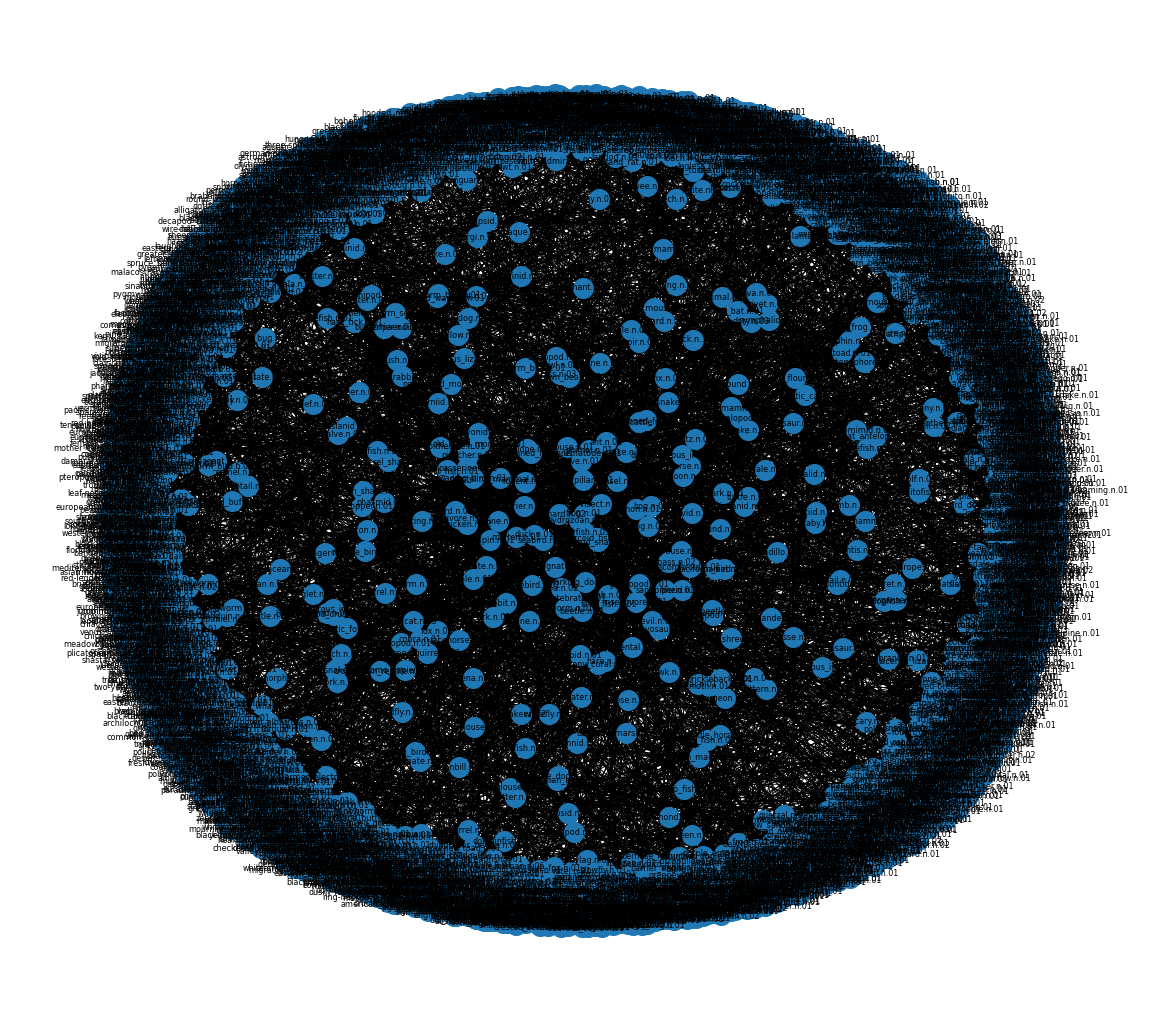

In [61]:
print(f"Nodi totali: {len(G.nodes())}")
print(f"Archi totali: {len(G.edges())}")

# Disegno
plt.figure(figsize=(16, 14))

pos = nx.spring_layout(G, k=0.5)

nx.draw(G, pos, with_labels=True, font_size=8, node_size=400, arrows=True)
plt.show()

In [6]:
root = "animal.n.01"
Gt = nx.DiGraph()
Gt.add_edges_from(G.edges())
Gt = nx.transitive_closure(Gt)
Gt = Gt.reverse(copy=True)

print(f"Nodi totali: {len(Gt.nodes())}")
print(f"Archi totali: {len(Gt.edges())}")

Nodi totali: 3999
Archi totali: 29653


In [39]:
depths = dict(nx.single_source_shortest_path_length(G, root))
h = max(depths.values())

# Normalizzazione della dimensione in base alla profondità
# (più grande alla radice, più piccolo alle foglie)
max_size = 20
min_size = 5
node_sizes = [
    max_size - ( (depth / h) * (max_size - min_size) )
    for depth in depths.values()
]

In [12]:
model = PoincareModel(train_data=Gt.edges(), size=2, negative=5, burn_in=70, burn_in_alpha=0.02, alpha=0.10)

In [57]:
model.train(epochs=250)

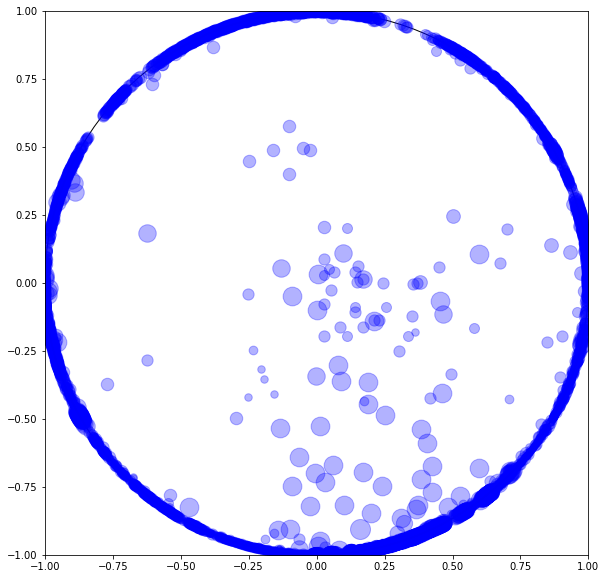

In [59]:
labels = model.kv.index_to_key
embeddings = np.array([model.kv[k] for k in labels])

plt.figure(figsize=(10, 10))

# Cerchio del disco di Poincaré
circle = plt.Circle((0,0), 1, color='black', fill=False)
plt.gca().add_artist(circle)

for i, label in enumerate(labels):
    x, y = embeddings[i]
    plt.plot(x, y, 'o', color="blue", markersize=node_sizes[i], alpha=0.3)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [35]:
import matplotlib.pyplot as plt

def print_path(start, end):
    path = nx.shortest_path(G, source=start, target=end)
    print(path)

    embeddings = {node: model.kv[node] for node in model.kv.key_to_index}

    xs = []
    ys = []
    plt.figure(figsize=(11, 10))

    circle = plt.Circle((0,0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)

    for word, vec in embeddings.items():
        if word not in l:
            xs.append(vec[0])
            ys.append(vec[1])

    plt.scatter(xs, ys, color="grey", s=10)

    for i, node in enumerate(path):
        if node == start or node == end:
            plt.scatter(embeddings[node][0], embeddings[node][1], c="blue")#, s=200, zorder=2)
            plt.text(embeddings[node][0], embeddings[node][1], node, fontsize=11)
        else:
            plt.scatter(embeddings[node][0], embeddings[node][1], c="red")#, s=200, zorder=2)

    path_coords = [embeddings[n] for n in path]
    px, py = zip(*path_coords)
    plt.plot(px, py, c="red", linewidth=2, zorder=0)
    plt.show()    

['animal.n.01', 'domestic_animal.n.01', 'dog.n.01', 'puppy.n.01']


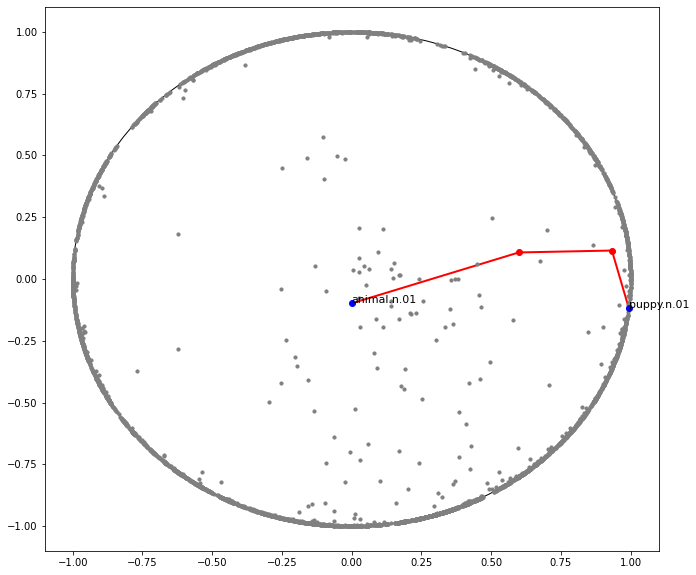

In [60]:
print_path("animal.n.01", "puppy.n.01")

['animal.n.01', 'chordate.n.01', 'vertebrate.n.01', 'mammal.n.01', 'placental.n.01', 'carnivore.n.01', 'feline.n.01', 'cat.n.01', 'wildcat.n.03', 'lynx.n.02', 'canada_lynx.n.01']


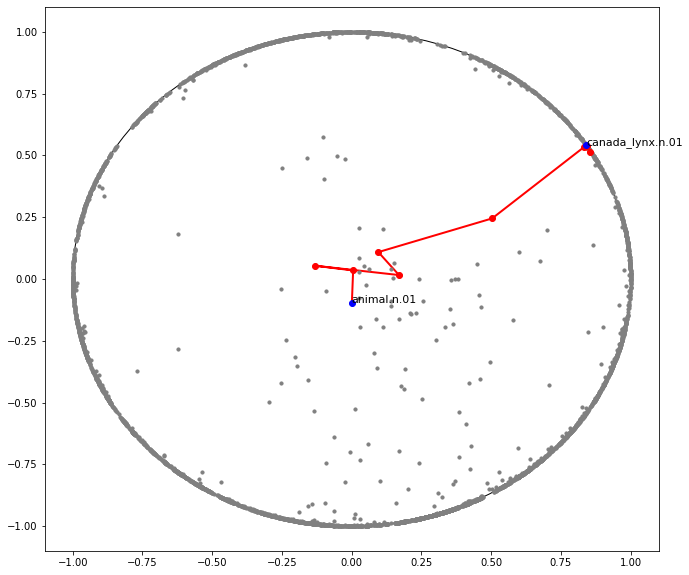

In [61]:
print_path("animal.n.01", "canada_lynx.n.01")

['animal.n.01', 'domestic_animal.n.01', 'dog.n.01', 'hunting_dog.n.01', 'sporting_dog.n.01', 'retriever.n.01', 'golden_retriever.n.01']


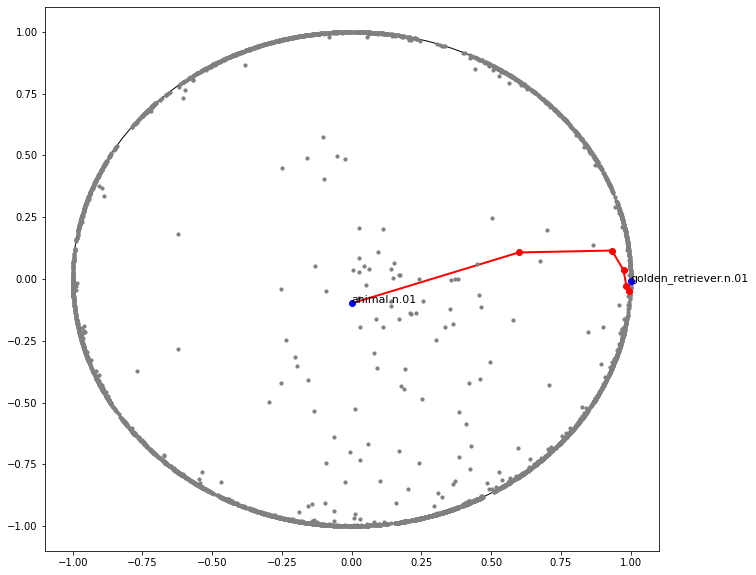

In [62]:
print_path("animal.n.01", "golden_retriever.n.01")

## ------------------------------------------------------------------------------------------------------------

# Utilizzando il grafo fornito dalla libreria hgcn denominato "disease_lp"

In [2]:
base = "ambiente/hgcn/data/"

# Percorso del file
file_path = base + "disease_lp/disease_lp.edges.csv"

# Carica il grafo da un file CSV (senza intestazioni)
G = nx.read_edgelist(file_path, delimiter=',', nodetype=int)

root = 0
children = list(G.neighbors(root))
colors = ["red", "blue", "yellow", "green", "grey", "orange", "magenta"]

node_colors = [None] * G.number_of_nodes()

for color, child in zip(colors, children):
    Gc = G.copy()
    Gc.remove_edge(root, child)
    subtree_nodes = nx.node_connected_component(Gc, child)
    for n in subtree_nodes:
        node_colors[n] = color

node_colors[root] = "black"

print("Numero di nodi:", G.number_of_nodes())
print("Numero di archi:", G.number_of_edges())

Numero di nodi: 2665
Numero di archi: 2664


In [3]:
depths = dict(nx.single_source_shortest_path_length(G, root))
h = max(depths.values())

# Normalizzazione della dimensione in base alla profondità
# (più grande alla radice, più piccolo alle foglie)
max_size = 30
min_size = 5
node_sizes = [
    max_size - ( (depth / h) * (max_size - min_size) )
    for depth in depths.values()
]

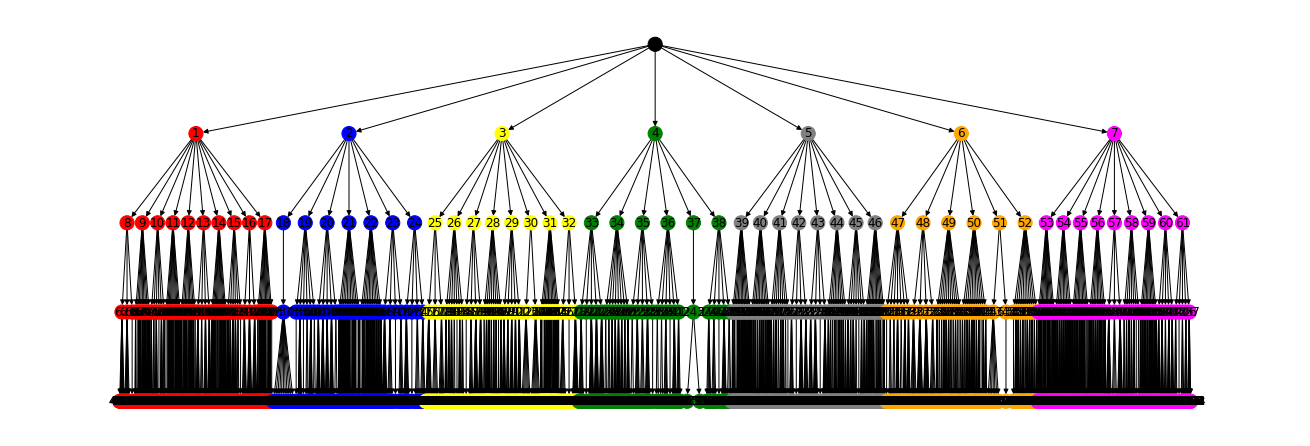

In [4]:
pos = hierarchy_pos(G, 0)

# Creo un DiGraph orientato root → figli
root = 0
G = nx.bfs_tree(G, source=root)

plt.figure(figsize=(18, 6))
nx.draw(G, pos=pos, with_labels=True, node_size=200, node_color=node_colors)
plt.show()

In [5]:
Gt = nx.DiGraph()
Gt.add_edges_from(G.edges())
Gt = nx.transitive_closure(Gt)
Gt = Gt.reverse(copy=True)

print("Numero di nodi:", Gt.number_of_nodes())
print("Numero di archi:", Gt.number_of_edges())

Numero di nodi: 2665
Numero di archi: 10161


Numero di nodi: 2665
Numero di archi: 10161


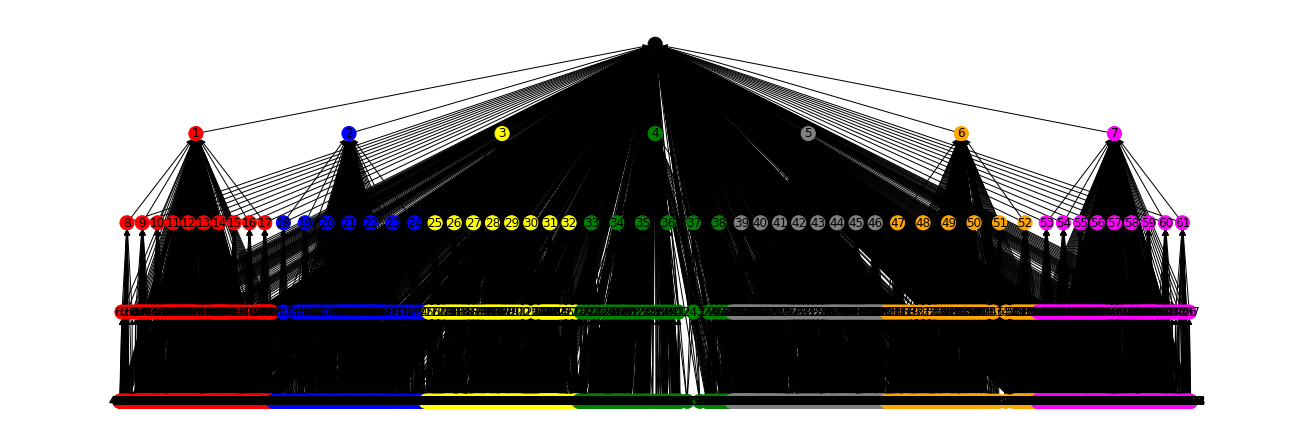

In [10]:
plt.figure(figsize=(18, 6))
nx.draw(Gt, pos=pos, with_labels=True, node_size=200, node_color=node_colors)
plt.show()

In [12]:
model = PoincareModel(train_data=Gt.edges(), size=2, negative=8, burn_in=150, burn_in_alpha=0.005, alpha=0.15)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

embedding_history = []
labels = model.kv.index_to_key
embedding = np.array([model.kv[k] for k in labels])
embedding_history.append(embedding)

# Addestramento con salvataggio ogni epoch
for epoch in range(250):
    model.train(epochs=1)

    embedding = np.array([model.kv[k] for k in labels])
    embedding_history.append(embedding)

# Funzione per disegnare embedding a uno step specifico
def plot_embedding(step):
    emb = embedding_history[step]
    plt.figure(figsize=(10, 10))
    
    # Cerchio del disco di Poincaré
    circle = plt.Circle((0,0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)

    for i, label in enumerate(labels):
        x, y = emb[i]
        plt.plot(x, y, 'o', color=node_colors[label], markersize=node_sizes[label], alpha=0.4)
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.title(f'Embedding dopo {250+step} epoch')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

#interact(plot_embedding, step=IntSlider(min=0, max=len(embedding_history)-1, step=1, value=0))
plot_embedding(250)

# Risultati
## Con negative=8, burn_in=150, burn_in_alpha=0.005, alpha=0.15
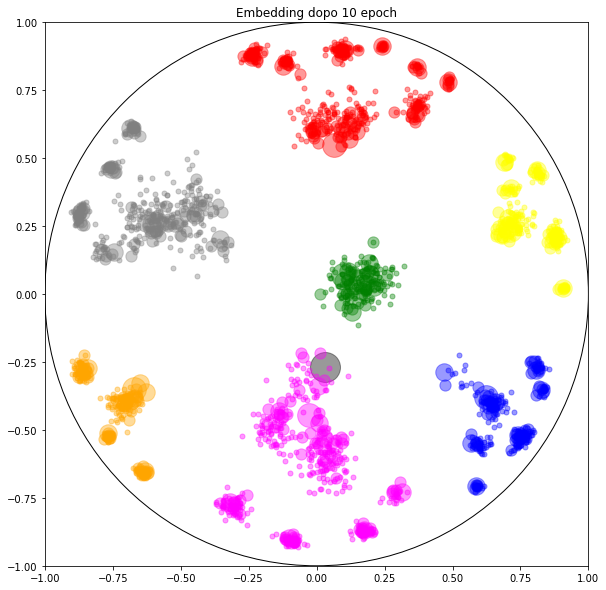
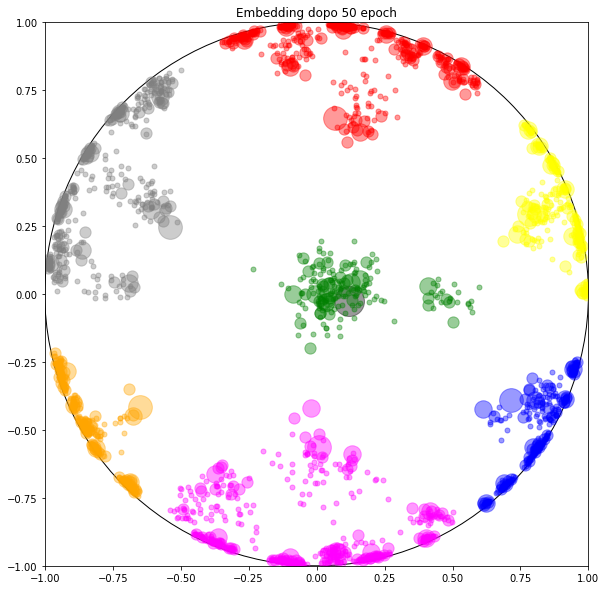
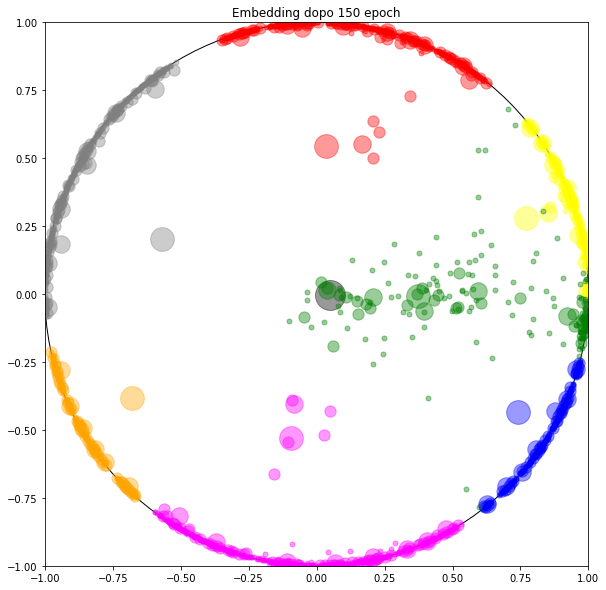
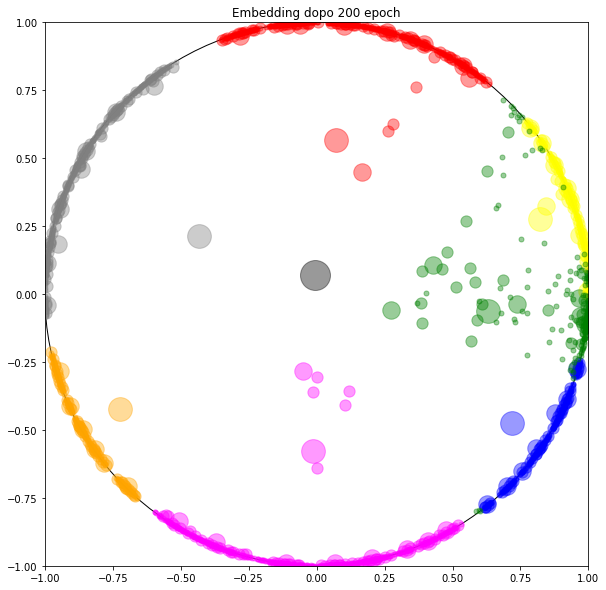
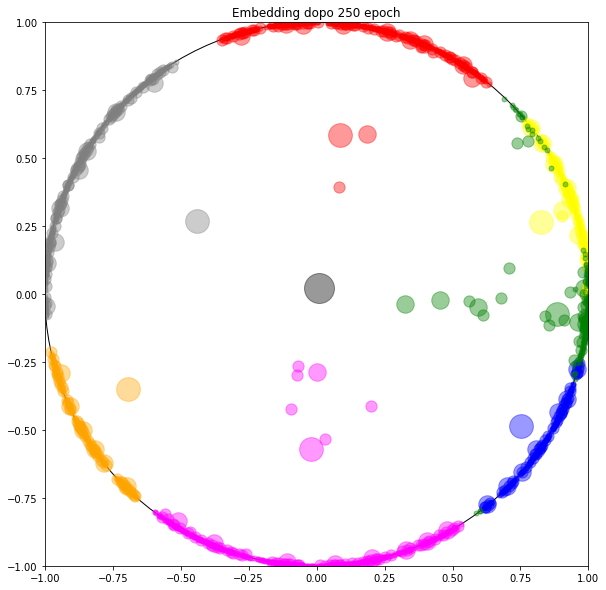

# Risultati
## Con negative=3, burn_in=150, burn_in_alpha=0.005, alpha=0.17
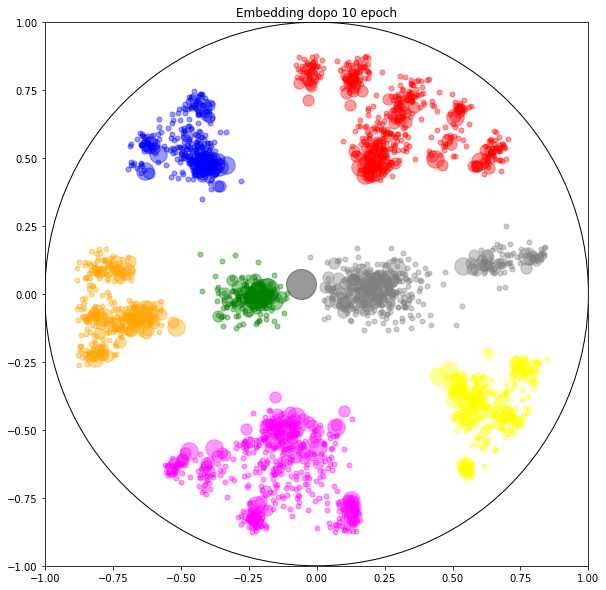
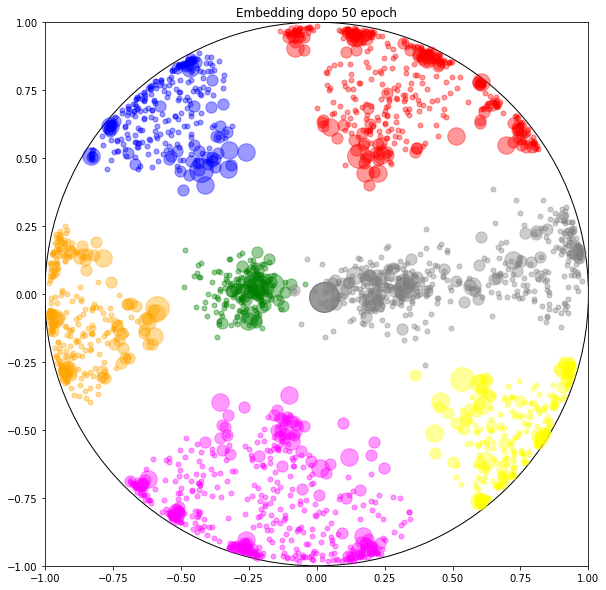
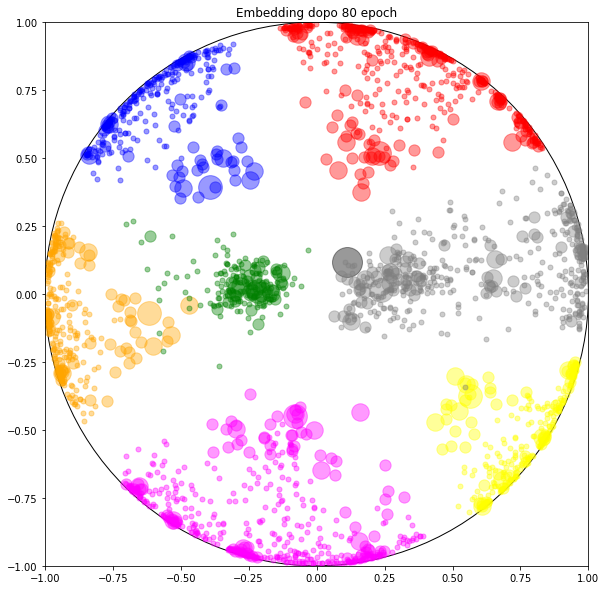
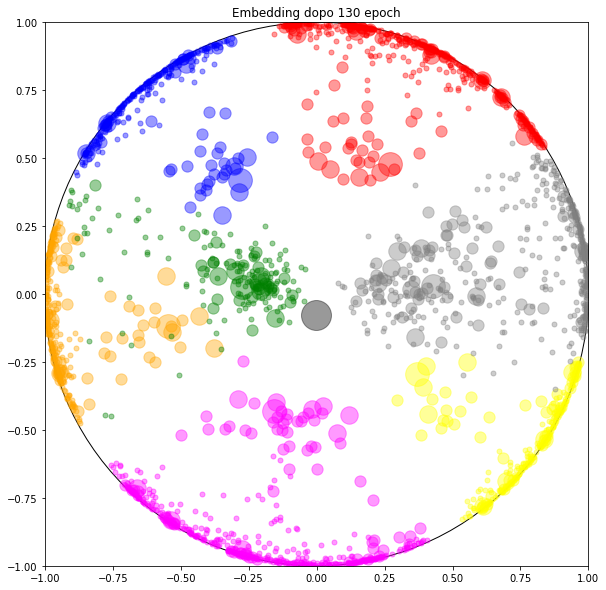
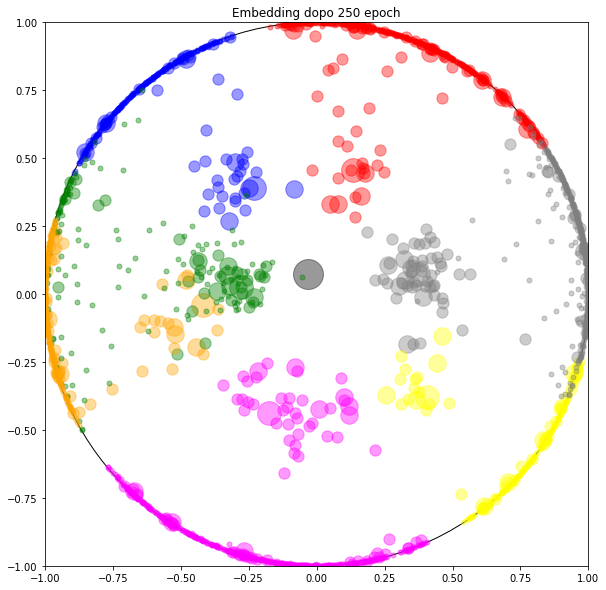
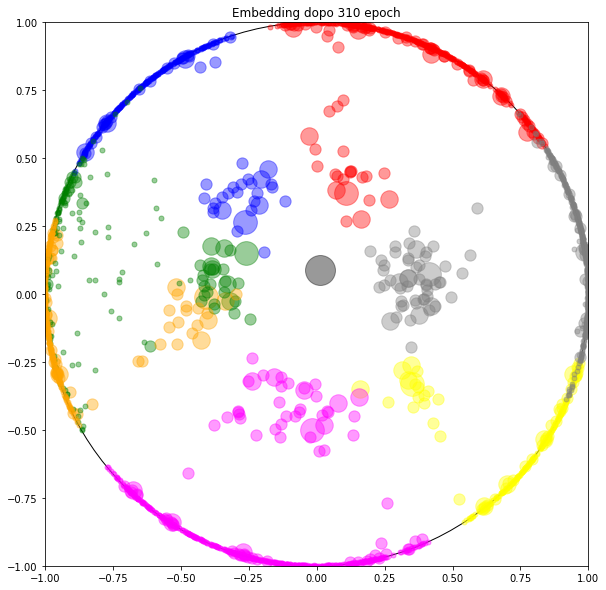
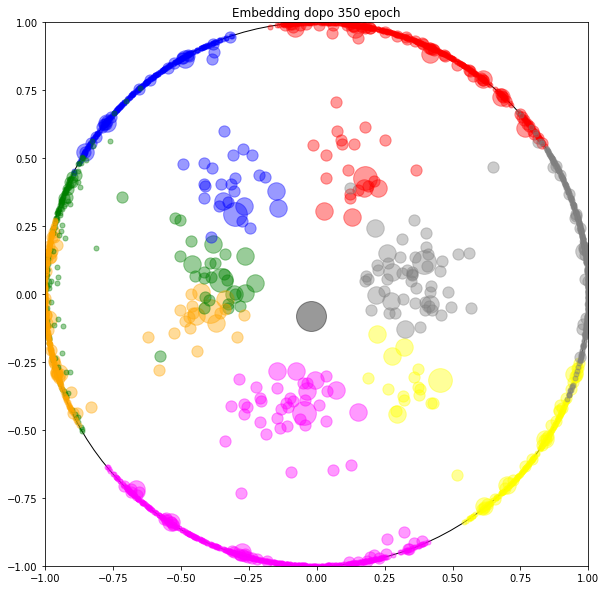